In [2]:
#!/usr/bin/env python
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# import data

def concat_csv(files_list):
    """
    files_list should be array of lists[('path', 'caller_name')]
    """
    req_cols = ['type', 'total.truth', 'total.query', 'tp', 'fp', 'fn', 'unk',
       'recall', 'precision', 'fp.region.size', 'fp.rate']
    
    final_df = pd.DataFrame()
    
    for file_path, caller in files_list:
        data = pd.read_csv(file_path, index_col=0)
        filter_data = data[data.type == 'SNVs'][req_cols]
        filter_data.insert(loc=0, column='caller', value=caller)
        if final_df.empty:
            final_df = filter_data
        else:
            final_df = final_df.append(filter_data)
            
    return final_df
    
    
stats_df = concat_csv([('hap.py/ACC5403A1_mutect_snvs.stats.csv','mutect'),
                       ('hap.py/ACC5403A1_vardict_snvs.stats.csv','vardict'),
                       ('hap.py/ACC5403A1_strelka.stats.csv','strelka'),
                       ('hap.py/ACC5403A1_concat.stats.csv','merged')])

stats_df

,caller,type,total.truth,total.query,tp,fp,fn,unk,recall,precision,fp.region.size,fp.rate
1,mutect,SNVs,472,0,0,0,472,0,0.000000,0.000000,26548,0.000000
1,vardict,SNVs,472,374,348,26,124,0,0.737288,0.930481,26548,979.358144
1,strelka,SNVs,472,204,204,0,268,0,0.432203,1.000000,26548,0.000000
1,merged,SNVs,472,376,350,26,122,0,0.741525,0.930851,26548,979.358144


<Figure size 720x360 with 0 Axes>

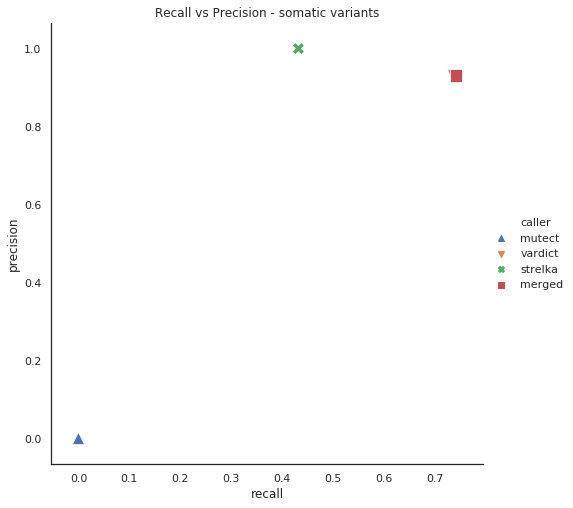

In [4]:
plt.figure(figsize=(10,5))
sns.set(style="white")
markers = {"mutect": "^", "strelka": "X", "vardict":"v", "merged": "s"}
sns_plot = sns.relplot(data=stats_df, x="recall", y="precision",hue='caller', style='caller', 
                markers=markers, height=7, s=150)
plt.title("Recall vs Precision - somatic variants")
plt.savefig('scatter_plot.png', bbox_inches="tight")

In [5]:
stats_df_bam = concat_csv([('hap.py/ACC5403A1_strelka_bam.stats.csv', 'strelka'),
                           ('hap.py/ACC5403A1_vardict_bam.stats.csv', 'vardict'),
                           ('hap.py/ACC5403A1_mutect2_gatk4.stats.csv', 'gatk4'),
                           ('hap.py/ACC5403A1_mutect2_gatk4_filtered.stats.csv', 'gatk4_filtered')])
stats_df_bam

,caller,type,total.truth,total.query,tp,fp,fn,unk,recall,precision,fp.region.size,fp.rate
1,strelka,SNVs,472,308,292,16,180,0,0.618644,0.948052,26548,602.681935
1,vardict,SNVs,472,407,380,27,92,0,0.805085,0.933661,26548,1017.025765
1,gatk4,SNVs,472,412,344,68,128,0,0.728814,0.834951,26548,2561.398222
1,gatk4_filtered,SNVs,472,50,50,0,422,0,0.105932,1.000000,26548,0.000000


Text(0.5, 1, 'Recall vs Precision - Strelka vs VarDict')

<Figure size 720x360 with 0 Axes>

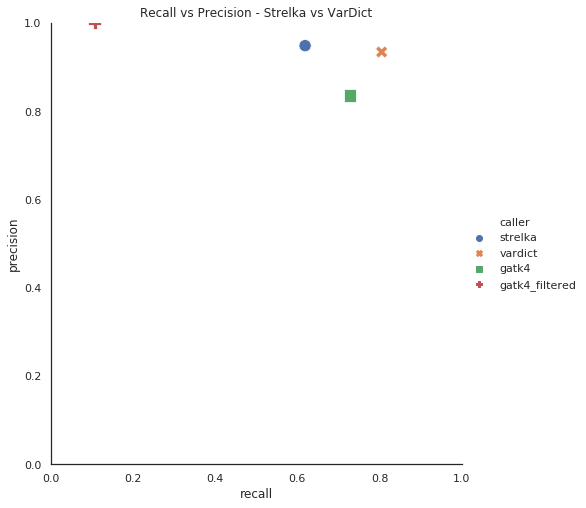

In [6]:
plt.figure(figsize=(10,5))
sns.set(style="white")
markers = {"strelka": "X", "vardict":"^", }
sns_plot = sns.relplot(data=stats_df_bam, x="recall", y="precision",hue='caller', style='caller', height=7, s=150)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("Recall vs Precision - Strelka vs VarDict")